## Author: Aniket Tanaji Dabade

### Data Analysis Assignment

Problem Statement

​​You work for the human resource department of a large corporation. The management is worried about the relatively high turnover, and your team must look into ways to reduce the number of employees leaving the company.
The team needs to understand better the situation, which employees are more likely to leave, and why. Once it is clear what variables impact employee churn, you can present your findings along with your ideas on how to attack the problem.


Dataset  link : https://drive.google.com/file/d/1CKsZhna66HcEl_2SgkjTo23EmBmw_UNQ/view?usp=sharing

### Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


### Importing Dataset

In [2]:
data=pd.read_csv(r"C:\Users\admin\Desktop\GEOGO\RECEIVED DS\employee_churn_data.csv")

In [3]:
data.head()

,department,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left
0,operations,0,0.577569,3,low,5.0,0.626759,0,180.866070,no
1,operations,0,0.751900,3,medium,6.0,0.443679,0,182.708149,no
2,support,0,0.722548,3,medium,6.0,0.446823,0,184.416084,no
3,logistics,0,0.675158,4,high,8.0,0.440139,0,188.707545,no
4,sales,0,0.676203,3,high,5.0,0.577607,1,179.821083,no


In [4]:
data.tail()

,department,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left
9535,operations,0,0.610988,4,medium,8.0,0.543641,0,188.155738,yes
9536,logistics,0,0.746887,3,medium,8.0,0.549048,0,188.176164,yes
9537,operations,0,0.557980,3,low,7.0,0.705425,0,186.531008,yes
9538,IT,0,0.584446,4,medium,8.0,0.607287,1,187.641370,yes
9539,finance,0,0.626373,3,low,7.0,0.706455,1,185.920934,yes


In [5]:
data.shape

(9540, 10)

In [6]:
data.columns

Index(['department', 'promoted', 'review', 'projects', 'salary', 'tenure',
       'satisfaction', 'bonus', 'avg_hrs_month', 'left'],
      dtype='object')

In [7]:
data.dtypes

department        object
promoted           int64
review           float64
projects           int64
salary            object
tenure           float64
satisfaction     float64
bonus              int64
avg_hrs_month    float64
left              object
dtype: object

In [8]:
data.isnull().sum()

department       0
promoted         0
review           0
projects         0
salary           0
tenure           0
satisfaction     0
bonus            0
avg_hrs_month    0
left             0
dtype: int64

In [9]:
data['left'].value_counts()

no     6756
yes    2784
Name: left, dtype: int64

In [10]:
data.groupby('left').mean()

,promoted,review,projects,tenure,satisfaction,bonus,avg_hrs_month
left,,,,,,,
no,0.034340,0.635164,3.279455,6.546625,0.505634,0.215068,184.637605
yes,0.020474,0.692262,3.263649,6.579382,0.502244,0.204741,184.719730


### Observations:
#### 1. The promoted employees are more likely stays with the company as compared to the employees who left.
#### 2. The average satisfaction level of employees who stayed with the company is higher than that of the employees who left.
#### 3. The average monthly work hours of employees who left the company is more than that of the employees who stayed.
#### 4. The Avearge of employees who did not get bonus is more than that employees who got bonus. 

In [11]:
data.groupby('department').mean()

,promoted,review,projects,tenure,satisfaction,bonus,avg_hrs_month
department,,,,,,,
IT,0.022472,0.647746,3.289326,6.609551,0.515818,0.221910,184.820946
admin,0.037825,0.647086,3.278960,6.498818,0.519444,0.186761,184.538120
engineering,0.023087,0.650601,3.263852,6.558047,0.504944,0.211082,184.691962
finance,0.047264,0.654934,3.293532,6.440299,0.497183,0.231343,184.375116
logistics,0.019444,0.654374,3.275000,6.527778,0.493084,0.208333,184.589924
marketing,0.042394,0.657694,3.280549,6.503741,0.502411,0.219451,184.469963
operations,0.029566,0.653397,3.271353,6.608410,0.504620,0.206965,184.812006
retail,0.033744,0.650152,3.266061,6.591175,0.502769,0.218689,184.735075
sales,0.026553,0.651631,3.286245,6.535847,0.504520,0.211896,184.616739


In [12]:
data.groupby('salary').mean()

,promoted,review,projects,tenure,satisfaction,bonus,avg_hrs_month
salary,,,,,,,
high,0.029716,0.651642,3.260336,6.580749,0.502463,0.213824,184.766428
low,0.028965,0.652816,3.304852,6.556119,0.504934,0.225199,184.657057
medium,0.030706,0.651663,3.271971,6.550446,0.505095,0.208894,184.637961


## Data Visualization

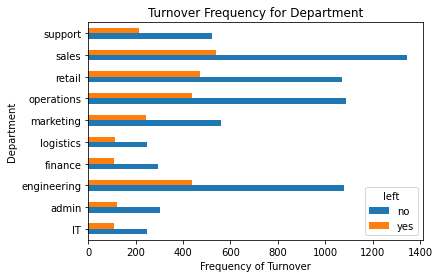

In [13]:
pd.crosstab(data.department,data.left).plot(kind='barh')
plt.title('Turnover Frequency for Department')
plt.ylabel('Department')
plt.xlabel('Frequency of Turnover')
plt.savefig('department_bar_chart')

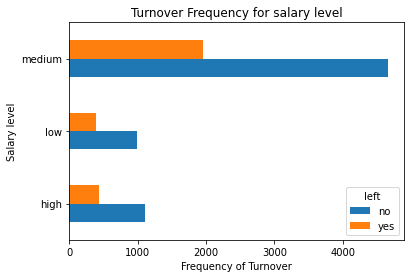

In [14]:
pd.crosstab(data.salary,data.left).plot(kind='barh')
plt.title('Turnover Frequency for salary level')
plt.ylabel('Salary level')
plt.xlabel('Frequency of Turnover')
plt.savefig('Salary_bar_chart')


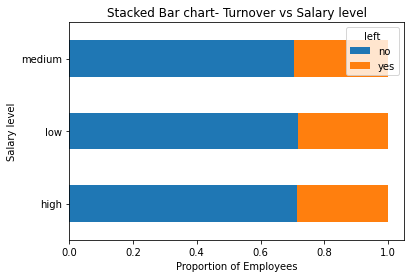

In [15]:
salary_data=pd.crosstab(data.salary, data.left)
salary_data.div(salary_data.sum(1).astype(float), axis=0).plot(kind='barh', stacked=True)
plt.title('Stacked Bar chart- Turnover vs Salary level')
plt.ylabel('Salary level')
plt.xlabel('Proportion of Employees')
plt.savefig('Salary_bar_chart')

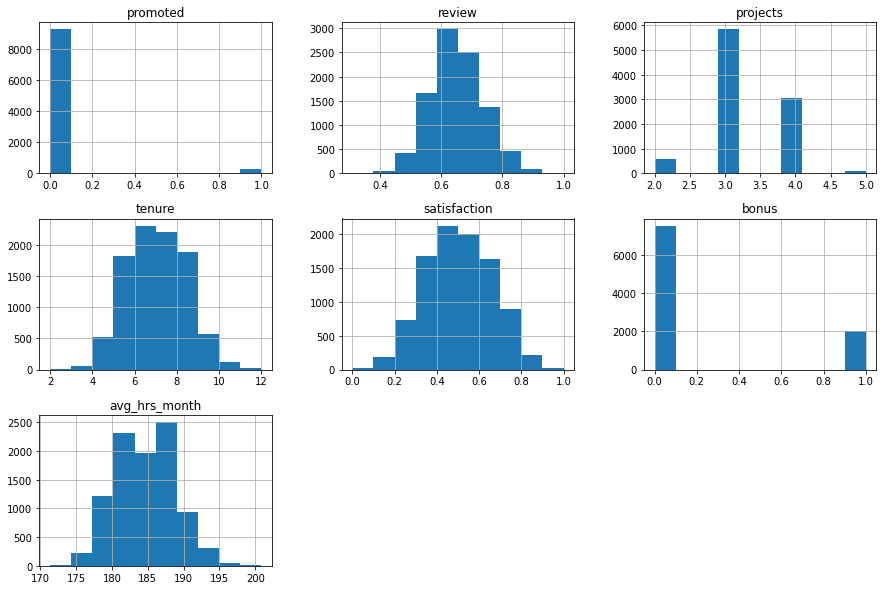

In [16]:
num_bins = 10
data.hist(bins=num_bins, figsize=(15,10))
plt.savefig("data_histogram_plots")
plt.show()

 ### Observation:
  #### 1. Very few employees got Promotion
  #### 2. Most of the employees are working on 3-4 projects. Very few employees worked on 2 & 5 no. of projects. 
  #### 3. No. of Employees with less than 5 years Tenure & more than 8 years tenure are less.There is huge drop between 8 years to  12 years tenure.
  #### 4. Very few employees got Bonus.

In [17]:
#Assigning Low=1, Medium= 2, High=3 for data in column 'salary'
data['salary'] = data['salary'].map(
                   {'low':1 ,'medium':2, 'high':3})
  
# show the dataframe
data

,department,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left
0,operations,0,0.577569,3,1,5.0,0.626759,0,180.866070,no
1,operations,0,0.751900,3,2,6.0,0.443679,0,182.708149,no
2,support,0,0.722548,3,2,6.0,0.446823,0,184.416084,no
3,logistics,0,0.675158,4,3,8.0,0.440139,0,188.707545,no
4,sales,0,0.676203,3,3,5.0,0.577607,1,179.821083,no
...,...,...,...,...,...,...,...,...,...,...
9535,operations,0,0.610988,4,2,8.0,0.543641,0,188.155738,yes
9536,logistics,0,0.746887,3,2,8.0,0.549048,0,188.176164,yes
9537,operations,0,0.557980,3,1,7.0,0.705425,0,186.531008,yes
9538,IT,0,0.584446,4,2,8.0,0.607287,1,187.641370,yes


In [18]:
#Assigning Yes=1, No= 0 for column 'left'
data['left'] = data['left'].map(
                   {'yes':1 ,'no':2})
  
# show the dataframe
data

,department,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left
0,operations,0,0.577569,3,1,5.0,0.626759,0,180.866070,2
1,operations,0,0.751900,3,2,6.0,0.443679,0,182.708149,2
2,support,0,0.722548,3,2,6.0,0.446823,0,184.416084,2
3,logistics,0,0.675158,4,3,8.0,0.440139,0,188.707545,2
4,sales,0,0.676203,3,3,5.0,0.577607,1,179.821083,2
...,...,...,...,...,...,...,...,...,...,...
9535,operations,0,0.610988,4,2,8.0,0.543641,0,188.155738,1
9536,logistics,0,0.746887,3,2,8.0,0.549048,0,188.176164,1
9537,operations,0,0.557980,3,1,7.0,0.705425,0,186.531008,1
9538,IT,0,0.584446,4,2,8.0,0.607287,1,187.641370,1


### Analysis on the basis of Tenure & No.of Projects

In [19]:
#import module
from sklearn.cluster import KMeans
# Filter data
left_emp =  data[['tenure', 'projects']][data.left == 1]
# Create groups using K-means clustering.
kmeans = KMeans(n_clusters = 2, random_state = 0).fit(left_emp)


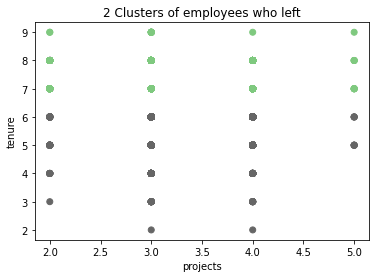

In [20]:
left_emp['label'] = kmeans.labels_
# Draw scatter plot
plt.scatter(left_emp['projects'],left_emp['tenure'], c=left_emp['label'],cmap='Accent')
plt.ylabel('tenure')
plt.xlabel('projects')
plt.title('2 Clusters of employees who left')
plt.show()

#### Observation: Employees with 3-4 projects & tenure less than 6 years (Shaded by green color in the graph)  are more likely to leave company.

### Analysis on the basis of Tenure

In [21]:
left_emp =  data[['tenure', 'left']][data.left == 1]
# Create groups using K-means clustering.
kmeans = KMeans(n_clusters = 2, random_state = 1).fit(left_emp)

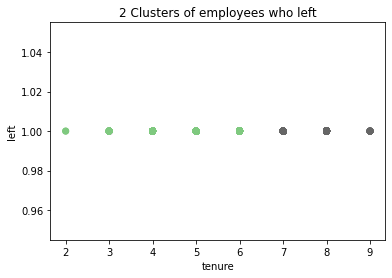

In [22]:
left_emp['label'] = kmeans.labels_
# Draw scatter plot
plt.scatter(left_emp['tenure'],left_emp['left'], c=left_emp['label'],cmap='Accent')
plt.xlabel('tenure')
plt.ylabel('left')
plt.title('2 Clusters of employees who left')
plt.show()

#### Observation: Employees with tenure less than 6 years (Shaded by green color in the graph) are more likely to leave company.

### Analysis on the basis of Promotion & Satisfaction

In [23]:
left_emp =  data[['promoted','satisfaction']][data.left == 1]
# Create groups using K-means clustering.
kmeans = KMeans(n_clusters = 2, random_state = 1).fit(left_emp)

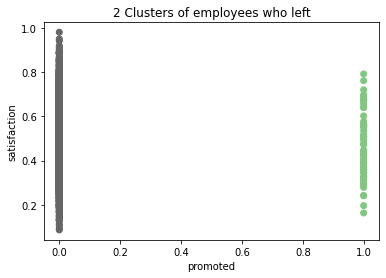

In [24]:
left_emp['label'] = kmeans.labels_
# Draw scatter plot
plt.scatter(left_emp['promoted'],left_emp['satisfaction'], c=left_emp['label'],cmap='Accent')
plt.ylabel('satisfaction')
plt.xlabel('promoted')
plt.title('2 Clusters of employees who left')
plt.show()

#### Observation: Employees with No promotion (Shaded by grey color in the graph)  are more likely to leave company.

### Analysis on the basis of Tenure & Salary

In [25]:
left_emp =  data[['tenure','salary']][data.left == 1]
# Create groups using K-means clustering.
kmeans = KMeans(n_clusters = 2, random_state = 1).fit(left_emp)

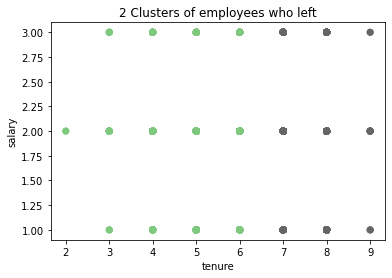

In [26]:
left_emp['label'] = kmeans.labels_
# Draw scatter plot
plt.scatter(left_emp['tenure'],left_emp['salary'], c=left_emp['label'],cmap='Accent')
plt.ylabel('salary')
plt.xlabel('tenure')
plt.title('2 Clusters of employees who left')
plt.show()

#### Observation: Employees with Medium salary level & tenure less than 6 years are more likely to leave company.

### Analysis on the basis of Average no. of working hours/Month & Satisfaction

In [27]:
left_emp =  data[['avg_hrs_month','satisfaction']][data.left == 1]
# Create groups using K-means clustering.
kmeans = KMeans(n_clusters = 2, random_state = 1).fit(left_emp)

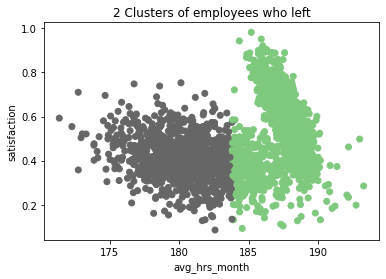

In [28]:
left_emp['label'] = kmeans.labels_
# Draw scatter plot
plt.scatter(left_emp['avg_hrs_month'],left_emp['satisfaction'], c=left_emp['label'],cmap='Accent')
plt.xlabel('avg_hrs_month')
plt.ylabel('satisfaction')
plt.title('2 Clusters of employees who left')
plt.show()

#### Observation: Employees with Average working hours between 175 hrs to 185 hrs are more likely to leave company.

### Analysis on the basis of Average no. of working hours/Month & Salary

In [29]:
left_emp =  data[['avg_hrs_month','salary']][data.left == 1]
# Create groups using K-means clustering.
kmeans = KMeans(n_clusters = 2, random_state = 1).fit(left_emp)

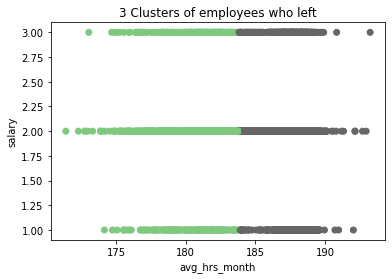

In [30]:
left_emp['label'] = kmeans.labels_
# Draw scatter plot
plt.scatter(left_emp['avg_hrs_month'],left_emp['salary'], c=left_emp['label'],cmap='Accent')
plt.xlabel('avg_hrs_month')
plt.ylabel('salary')
plt.title('3 Clusters of employees who left')
plt.show()

#### Observation: Employees with Average working hours between 175 to 185 hrs but medium level Salary are more likely to leave company.

### Analysis on the basis of Average no. of working hours/Month

In [31]:
left_emp =  data[['avg_hrs_month','left']][data.left == 1]
# Create groups using K-means clustering.
kmeans = KMeans(n_clusters = 2, random_state = 1).fit(left_emp)

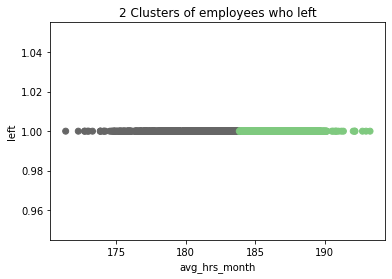

In [32]:
left_emp['label'] = kmeans.labels_
# Draw scatter plot
plt.scatter(left_emp['avg_hrs_month'],left_emp['left'], c=left_emp['label'],cmap='Accent')
plt.xlabel('avg_hrs_month')
plt.ylabel('left')
plt.title('2 Clusters of employees who left')
plt.show()

#### Observation: Employees with Average working hours between 175 to 185 hrs are more likely to leave company.

### Analysis on the basis of Reviews

In [33]:
left_emp =  data[['review','left']][data.left == 1]
# Create groups using K-means clustering.
kmeans = KMeans(n_clusters = 2, random_state = 1).fit(left_emp)

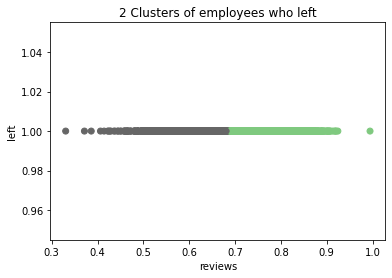

In [34]:
left_emp['label'] = kmeans.labels_
# Draw scatter plot
plt.scatter(left_emp['review'],left_emp['left'], c=left_emp['label'],cmap='Accent')
plt.ylabel('left')
plt.xlabel('reviews')
plt.title('2 Clusters of employees who left')
plt.show()

#### Observation: Employees with reviews less than 0.7 are more likely to leave company.

## Building a Prediction Model

### Pre-Processing Data

In [35]:
# Import Label Encoder
from sklearn import preprocessing
#creating labelEncoder
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
data['salary']=le.fit_transform(data['salary'])
data['department']=le.fit_transform(data['department'])

### Split, Train and Testing DataSet

In [36]:
#Spliting data into Feature and
X=data[['department', 'promoted', 'review', 'projects', 'salary', 'tenure',
       'satisfaction', 'bonus', 'avg_hrs_month']]
y=data['left']

In [37]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  # 70% training and 30% test

### Building a Model

In [38]:
#Import Gradient Boosting Classifier model
from sklearn.ensemble import GradientBoostingClassifier

#Create Gradient Boosting Classifier
gb = GradientBoostingClassifier()

#Train the model using the training sets
gb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gb.predict(X_test)

### Evaluating Model Performance

In [39]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# Model Precision
print("Precision:",metrics.precision_score(y_test, y_pred))
# Model Recall
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8612858141160028
Precision: 0.8059071729957806
Recall: 0.6887019230769231


## CONCLUSION:

### From above all scatter plots we can colclude following:

#### 1. Most of the employees leaving company have experience below 6 years. Maximum number of Employees are leaving organization after completing 6 years. From available data we can see that these employees worked on avg. 3-4 projects & they were earning medium salary. They might be looking to expand their knowledge, skills, & looking for a good career growth. This can be a possible reason for their leaving. 

#### 2. The Employees who didn't get Promotion, left the organization. Employees are expecting that company should know their values, Company should appreciate their efforts. If they do not get promoted for a long period of time during their service, there are high chances that they will leave the organization.

#### 3. Maximum number of employees who left the organization were working around 175-185 hours/ Monthly. These working hours are actually lesser than employees who didnt leave the  organization. It looks like the employees who left the organization were not spending much time in office. They might be not liking their job & thus dont wanted to put extra efforts or working hours.

#### 4. Maximum number of employees who left the organization were earning Medium salary. Salary is always an importnant factor behind employees dissatisfaction. 

    